In [ ]:
#importing files...
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#reading csv file...
ipl = pd.read_csv('matches.csv')

In [ ]:
#Extracting first 5 rows...
ipl.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
#Extracting first & last 5 rows...
ipl.head(-5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,11342,IPL-2019,Mumbai,02-05-2019,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium,S Ravi,O Nandan,Nanda Kishore
747,11343,IPL-2019,Mohali,03-05-2019,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,7,S Gill,IS Bindra Stadium,Bruce Oxenford,C Shamshuddin,KN Ananthapadmanabhan
748,11344,IPL-2019,Delhi,04-05-2019,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,normal,0,Delhi Capitals,0,5,A Mishra,Feroz Shah Kotla Ground,Ian Gould,Anil Dandekar,Nitin Menon
749,11345,IPL-2019,Bengaluru,04-05-2019,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,S Hetmyer,M. Chinnaswamy Stadium,Nigel Llong,Anil Chaudhary,Ulhas Gandhe


In [ ]:
#Extracting information of file..
ipl.info

<bound method DataFrame.info of         id    Season  ...         umpire2                  umpire3
0        1  IPL-2017  ...        NJ Llong                      NaN
1        2  IPL-2017  ...          S Ravi                      NaN
2        3  IPL-2017  ...       CK Nandan                      NaN
3        4  IPL-2017  ...   C Shamshuddin                      NaN
4        5  IPL-2017  ...             NaN                      NaN
..     ...       ...  ...             ...                      ...
751  11347  IPL-2019  ...        O Nandan                   S Ravi
752  11412  IPL-2019  ...     Nitin Menon                Ian Gould
753  11413  IPL-2019  ...             NaN                      NaN
754  11414  IPL-2019  ...  Bruce Oxenford  Chettithody Shamshuddin
755  11415  IPL-2019  ...       Ian Gould              Nigel Llong

[756 rows x 18 columns]>

In [ ]:
#Delete one improper column from the table...
ipl.drop(["umpire3"],axis=1,inplace=True)

In [ ]:
ipl.info

<bound method DataFrame.info of         id    Season  ...         umpire1         umpire2
0        1  IPL-2017  ...     AY Dandekar        NJ Llong
1        2  IPL-2017  ...  A Nand Kishore          S Ravi
2        3  IPL-2017  ...     Nitin Menon       CK Nandan
3        4  IPL-2017  ...    AK Chaudhary   C Shamshuddin
4        5  IPL-2017  ...             NaN             NaN
..     ...       ...  ...             ...             ...
751  11347  IPL-2019  ...   Nanda Kishore        O Nandan
752  11412  IPL-2019  ...     Nigel Llong     Nitin Menon
753  11413  IPL-2019  ...             NaN             NaN
754  11414  IPL-2019  ...   Sundaram Ravi  Bruce Oxenford
755  11415  IPL-2019  ...     Nitin Menon       Ian Gould

[756 rows x 17 columns]>

In [ ]:
#All columns of the table...
ipl.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
#Number of rows and columns in the table..
ipl.shape

(756, 17)

In [ ]:
#Description of numerical data...
ipl.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [ ]:
#Number of rows in a perticular column...
ipl['id'].count()

756

In [ ]:
#Most wins by a team...
temp = pd.DataFrame({"Winner":ipl['winner']})
count_wins = temp.value_counts()
print(count_wins)

Winner                     
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
dtype: int64


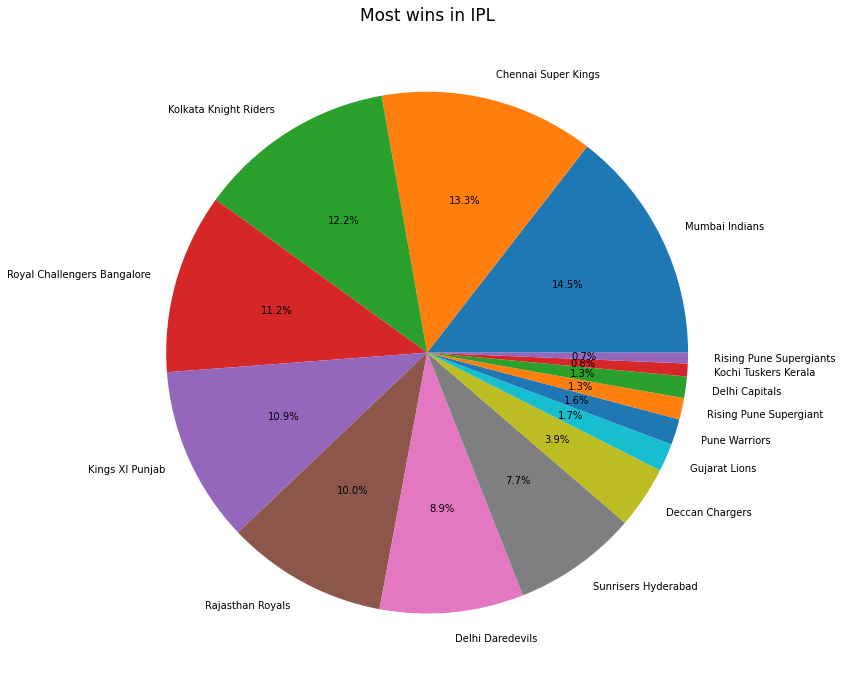

In [ ]:
#Most wins by a team pie chart...
temp = pd.DataFrame({"Winner":ipl['winner']})
count_wins = temp.value_counts()
teams = [X[0] for X in count_wins.keys()]
bar , ax = plt.subplots(figsize=(20,12))
ax = plt.pie(x = count_wins,autopct = "%.1f%%",labels = teams)
plt.title("Most wins in IPL",fontsize = 17)
plt.show()

In [ ]:
#Decision making of teams...
teams = ipl['toss_winner'].unique()
decision_making = pd.DataFrame([],columns = ["Toss winner","Decision","Times"])
for id,element in enumerate(teams):
  temp_bat = ipl[(ipl['toss_winner']==element) & (ipl['toss_decision']=='bat')]
  temp_field = ipl[(ipl['toss_winner']==element) & (ipl['toss_decision']=='field')]
  decision_making = decision_making.append({'Toss winner':element,'Decision':'bat','Times':temp_bat['toss_winner'].count()},ignore_index=True)
  decision_making = decision_making.append({'Toss winner':element,'Decision':'field','Times':temp_field['toss_winner'].count()},ignore_index=True)
print(decision_making)

                    Toss winner Decision Times
0   Royal Challengers Bangalore      bat    20
1   Royal Challengers Bangalore    field    61
2        Rising Pune Supergiant      bat     0
3        Rising Pune Supergiant    field     6
4         Kolkata Knight Riders      bat    30
5         Kolkata Knight Riders    field    62
6               Kings XI Punjab      bat    26
7               Kings XI Punjab    field    55
8           Sunrisers Hyderabad      bat    20
9           Sunrisers Hyderabad    field    26
10               Mumbai Indians      bat    44
11               Mumbai Indians    field    54
12                Gujarat Lions      bat     1
13                Gujarat Lions    field    14
14             Delhi Daredevils      bat    29
15             Delhi Daredevils    field    51
16          Chennai Super Kings      bat    48
17          Chennai Super Kings    field    41
18             Rajasthan Royals      bat    32
19             Rajasthan Royals    field    48
20           

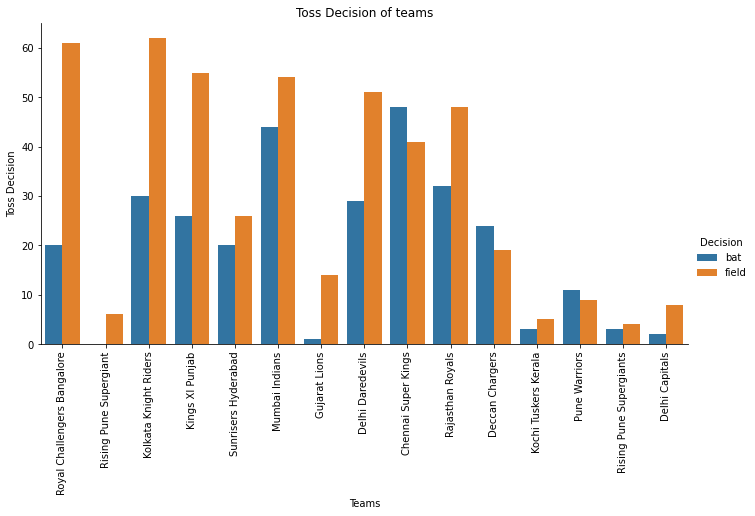

In [ ]:
#Bar plot of above data...
sns.catplot(x = 'Toss winner',y = 'Times',hue = 'Decision',data = decision_making,kind = 'bar',height = 5,aspect = 2)
plt.xticks(rotation = 90)
plt.title("Toss Decision of teams")
plt.xlabel("Teams")
plt.ylabel("Toss Decision")
plt.show()

In [ ]:
#Players with most MoM awards
ipl['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
                  ..
MN Samuels         1
JJ Roy             1
AP Tare            1
Umar Gul           1
RS Bopara          1
Name: player_of_match, Length: 226, dtype: int64

In [ ]:
#10 Players with most MoM awards ...
ipl['player_of_match'].value_counts()[0:10]

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64

In [ ]:
ipl['player_of_match'].value_counts()[0:5]

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
Name: player_of_match, dtype: int64

In [ ]:
#Only names of the players who won the most MoM awards.. 
list(ipl['player_of_match'].value_counts()[0:5].keys())

['CH Gayle', 'AB de Villiers', 'DA Warner', 'MS Dhoni', 'RG Sharma']

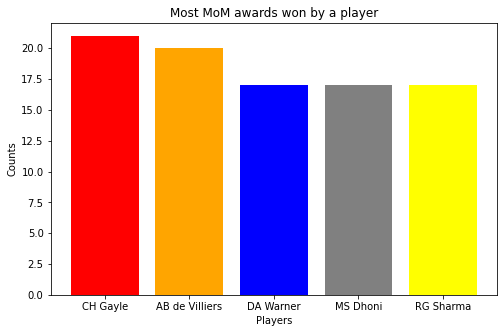

In [ ]:
#Bar plot of players that won MoM awards 
plt.figure(figsize=(8,5))
plt.bar(list(ipl['player_of_match'].value_counts()[0:5].keys()),list(ipl['player_of_match'].value_counts()[0:5]),color=["red","orange","blue","grey","yellow"])
plt.xlabel("Players")
plt.ylabel("Counts")
plt.title("Most MoM awards won by a player")
plt.show()

In [ ]:
#Result of each match...
ipl['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [ ]:
#Teams with their toss winning luck..
ipl['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

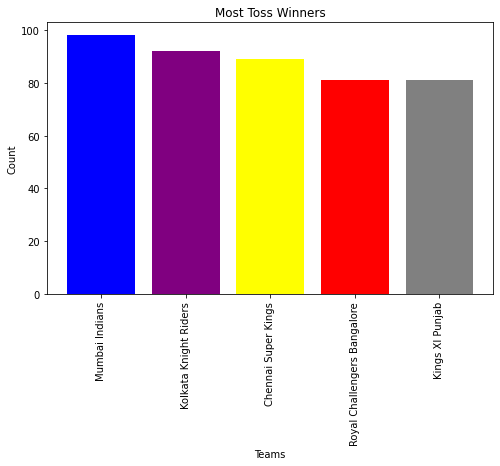

In [ ]:
#Bar plot of teams versus their toss winning matches
plt.figure(figsize=(8,5))
plt.bar(list(ipl['toss_winner'].value_counts()[0:5].keys()),list(ipl['toss_winner'].value_counts()[0:5]),color=["blue","purple","yellow","red","grey"])
plt.xlabel("Teams")
plt.ylabel("Count")
plt.title("Most Toss Winners")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#Rows where teams won who batted first...
batting_first = ipl[ipl['win_by_runs']!=0]

In [ ]:
batting_first.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
8,9,IPL-2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
13,14,IPL-2017,Kolkata,15-04-2017,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong
14,15,IPL-2017,Delhi,15-04-2017,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon


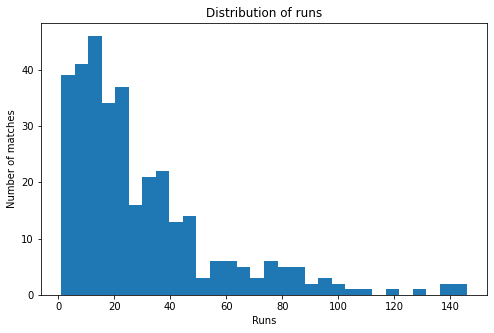

In [ ]:
#Bar plot of above data...
plt.figure(figsize=(8,5))
plt.hist(batting_first['win_by_runs'],bins=30)
plt.title("Distribution of runs")
plt.ylabel("Number of matches")
plt.xlabel("Runs")
plt.show()

In [ ]:
#Teams with their batting first winning strategy..
batting_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64

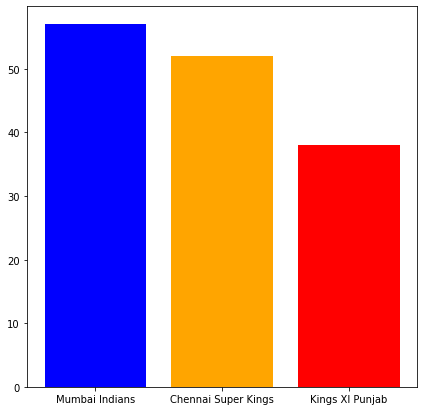

In [ ]:
#Plot of above data
plt.figure(figsize=(7,7))
plt.bar(list(batting_first['winner'].value_counts()[0:3].keys()),list(batting_first['winner'].value_counts()[0:3]),color=["blue","orange","red"])
plt.show()

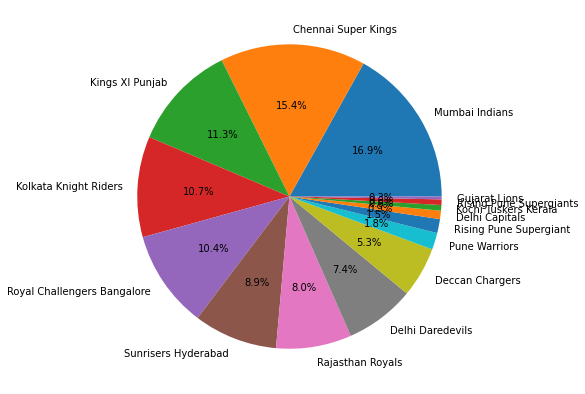

In [ ]:
#Pie plot of above data
plt.figure(figsize=(7,7))
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [ ]:
#Rows where team won who batted second
batting_second = ipl[ipl['win_by_wickets']!=0]

In [ ]:
batting_second.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan


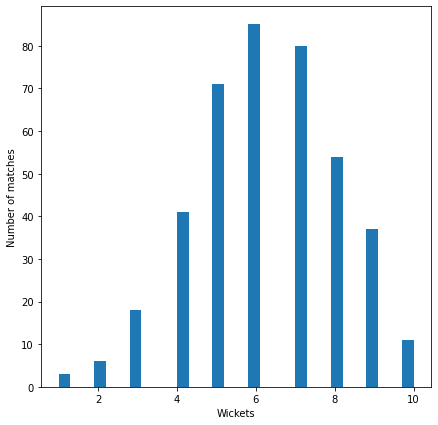

In [ ]:
#Bar plot of above data
plt.figure(figsize=(7,7))
plt.hist(batting_second['win_by_wickets'],bins=30)
plt.xlabel("Wickets")
plt.ylabel("Number of matches")
plt.show()

In [ ]:
#Teams with their chasing stratagy...
batting_second['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Chennai Super Kings            48
Royal Challengers Bangalore    48
Rajasthan Royals               46
Kings XI Punjab                42
Delhi Daredevils               42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Delhi Capitals                  6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

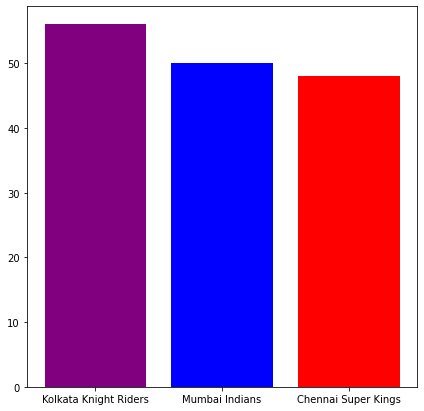

In [ ]:
#Bar plot of above data...
plt.figure(figsize=(7,7))
plt.bar(list(batting_second['winner'].value_counts()[0:3].keys()),list(batting_second['winner'].value_counts()[0:3]),color=["purple","blue","red"])
plt.show()

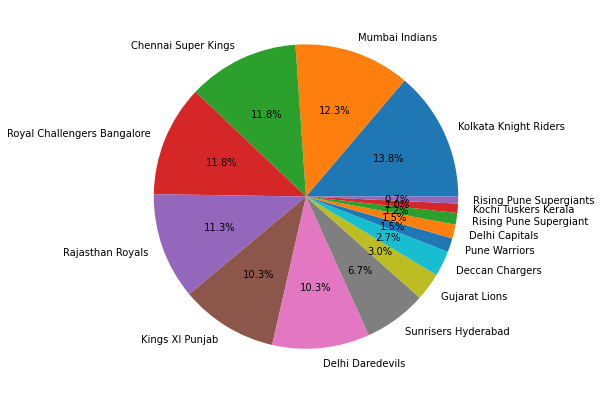

In [ ]:
#Pie chart of above data...
plt.figure(figsize=(7,7))
plt.pie(list(batting_second['winner'].value_counts()),labels=list(batting_second['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [ ]:
#Number of matches in each season...
ipl['Season'].value_counts()

IPL-2013    76
IPL-2012    74
IPL-2011    73
IPL-2019    60
IPL-2014    60
IPL-2010    60
IPL-2016    60
IPL-2018    60
IPL-2015    59
IPL-2017    59
IPL-2008    58
IPL-2009    57
Name: Season, dtype: int64

In [ ]:
#Number of matches played at each venue
ipl['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Ranchi              7
Abu Dhabi           7
Cape Town           7
Port Elizabeth      7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

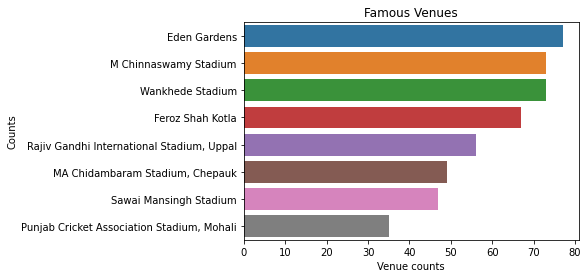

In [ ]:
#Famous Venues...
sns.barplot(x = ipl['venue'].value_counts().head(8).values,y = ipl['venue'].value_counts().head(8).index,data = ipl)
plt.title("Famous Venues")
plt.xlabel("Venue counts")
plt.ylabel("Counts")
plt.show()

In [ ]:
#Number of instances when a team won both match and also toss...
np.sum(ipl['toss_winner']==ipl['winner'])

393

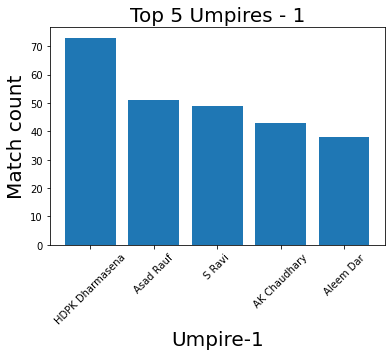

In [ ]:
#Umpires with most number of matches...  
plt.bar(ipl["umpire1"].value_counts().head().index,ipl["umpire1"].value_counts().head().values)
plt.title("Top 5 Umpires - 1", fontsize = 20)
plt.xlabel("Umpire-1", fontsize = 20)
plt.ylabel("Match count", fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

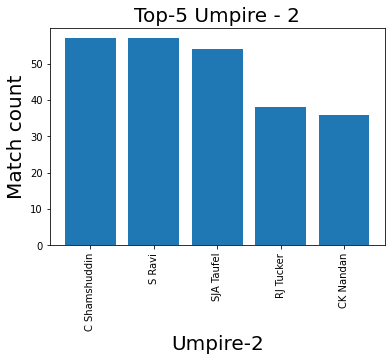

In [ ]:
#Umpires with most number of matches...
plt.bar(ipl["umpire2"].value_counts().head().index,ipl["umpire2"].value_counts().head().values)
plt.title("Top-5 Umpire - 2", fontsize = 20)
plt.xlabel("Umpire-2", fontsize = 20)
plt.ylabel("Match count", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

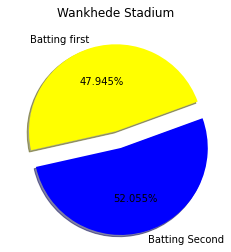

In [ ]:
#What should chosen to bat or bowl in the toss at particular venue..  
stadium=ipl.loc[(ipl['venue']=="Wankhede Stadium")]
stadium_runs=stadium[stadium['win_by_runs']>0]
slices=[len(stadium_runs),len(stadium)-len(stadium_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=20,shadow=1,explode=(0,0.2),autopct='%2.3f%%',colors=['yellow','blue'])
plt.title('Wankhede Stadium')
plt.show()

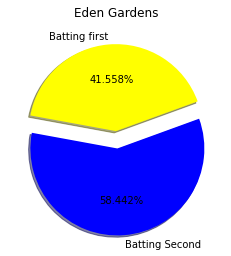

In [ ]:
#What should chosen to bat or bowl in the toss at particular venue..  
stadium=ipl.loc[(ipl['venue']=="Eden Gardens")]
stadium_runs=stadium[stadium['win_by_runs']>0]
slices=[len(stadium_runs),len(stadium)-len(stadium_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=20,shadow=1,explode=(0,0.2),autopct='%2.3f%%',colors=['yellow','blue'])
plt.title('Eden Gardens')
plt.show()